In [67]:
import pandas as pd
import numpy as np
import pydot
from IPython.display import Image, display
from collections import defaultdict

In [111]:
productions = {}
i = 0
with open("cfg.txt", "r") as f:
    for line in f:   
        line = line.rstrip('\n')
        line = line.replace('\'\'', 'eps')
        line = line.rstrip()
        if line != "":
            productions[i] = line
            i += 1

In [112]:
productions

{0: "START -> S'",
 1: "S' -> S NL S'",
 2: "S' -> eps",
 3: "S -> ID with ( ARGS ) NL S' plant",
 4: 'ARGS -> ARG',
 5: 'ARGS -> ARG , ARGS',
 6: 'ARGS -> eps',
 7: 'ARG -> DTYPE ID',
 8: 'ARG -> DTYPE # ID',
 9: 'S -> FUNCALL',
 10: 'FUNCALL -> reap ID with ( VARS )',
 11: 'VARS -> EXPR',
 12: 'VARS -> EXPR , VARS',
 13: 'VARS -> eps',
 14: 'S -> here lies ID NL __________ NL | NL SS |__________',
 15: 'SS -> | S NL SS',
 16: 'SS -> eps',
 17: 'S -> IFPAIR',
 18: 'IFPAIR -> IFCASE rotten IFPAIR',
 19: 'IFPAIR -> IFCASE rotten NL Sâ€™ dispose',
 20: 'IFPAIR -> IFCASE NL dispose',
 21: 'IFCASE -> EXPR fresh? NL Sâ€™',
 22: 'S -> kill',
 23: 'S -> skip',
 24: 'S -> supply EXPR',
 25: 'S -> sow ASIZE ID of DTYPE',
 26: 'ASIZE -> NUM',
 27: 'ASIZE -> eps',
 28: 'S -> EXPR is EXPR',
 29: 'S -> harvest INIT_COND FINAL_COND STEP BLKARROW NL Sâ€™ sell',
 30: 'INIT_COND -> eps',
 31: 'INIT_COND -> from EXPR is EXPR',
 32: 'FINAL_COND -> eternally',
 33: 'FINAL_COND -> until EXPR',
 34: 'STEP -

In [113]:
slr = pd.read_csv('slr.csv')
slr

,State,ACTION,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103
0,NaN,with,(,),plant,",",#,reap,here,lies,...,MODE,DTYPE,EXPR,UOP,BOP,NUM,STR,BLKARROW,ID,NL
1,0.0,NaN,NaN,NaN,r2,NaN,NaN,s16,s5,NaN,...,NaN,NaN,11,18,NaN,20,21,NaN,3,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,3.0,s28,NaN,r61,NaN,r61,s39,r61,NaN,NaN,...,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162
163,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
slr.columns

Index(['State', 'ACTION', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97',
       'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101',
       'Unnamed: 102', 'Unnamed: 103'],
      dtype='object', length=104)

In [115]:
goto_index = np.where(slr.columns == 'GOTO')[0][0]
goto_index

78

In [116]:
action_table = slr[slr.columns[:goto_index]]
action_table.columns = ['State'] + list(action_table.iloc[0].values[1:])
action_table = action_table.drop(0, axis=0)
action_table = action_table.astype(str)
action_table = action_table.astype({"State": float})
action_table = action_table.astype({"State": int})
action_table = action_table.set_index('State')
action_table

,with,(,),plant,",",#,reap,here,lies,__________,...,%,&&,||,sqrt,num,str,end,id,nl,$
State,,,,,,,,,,,,,,,,,,,,,
0,nan,nan,nan,r2,nan,nan,s16,s5,nan,nan,...,nan,nan,nan,nan,s24,s25,nan,s15,nan,r2
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,acc
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,s27,nan
3,s28,nan,r61,nan,r61,s39,r61,nan,nan,nan,...,s46,s47,s48,s49,r61,r61,r61,r61,r61,nan
4,nan,nan,r67,nan,r67,s39,r67,nan,nan,nan,...,s46,s47,s48,s49,r67,r67,r67,r67,r9,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,r14,nan
161,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,s27,nan
162,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [117]:
action_table.loc[85].loc['(']

's120'

In [118]:
goto_table = slr[['State'] + list(slr.columns[goto_index:])]
goto_table.columns = ['State'] + list(goto_table.iloc[0].values[1:])
goto_table= goto_table.drop(0, axis=0)
goto_table= goto_table.astype(str)
goto_table= goto_table.astype({"State": float})
goto_table = goto_table.astype({"State": int})
goto_table = goto_table.set_index('State')
goto_table

,START,S',S,ARGS,ARG,FUNCALL,VARS,SS,IFPAIR,IFCASE,...,MODE,DTYPE,EXPR,UOP,BOP,NUM,STR,BLKARROW,ID,NL
State,,,,,,,,,,,,,,,,,,,,,
0,nan,1,2,nan,nan,4,nan,nan,6,17,...,nan,nan,11,18,nan,20,21,nan,3,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,26
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,29,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,50,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
161,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,162
162,nan,nan,nan,nan,nan,nan,nan,163,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [119]:
action_table.loc[4].loc['nl']

'r9'

In [120]:
class Tree:
    def __init__(self, ide, data, children=[]):
        self.id = ide
        self.data = data
        self.children = children
    
    def add_child(self, node):
        self.children.append(node)

In [121]:
goto_table.loc[92].loc['DTYPE']

'nan'

In [122]:
productions

{0: "START -> S'",
 1: "S' -> S NL S'",
 2: "S' -> eps",
 3: "S -> ID with ( ARGS ) NL S' plant",
 4: 'ARGS -> ARG',
 5: 'ARGS -> ARG , ARGS',
 6: 'ARGS -> eps',
 7: 'ARG -> DTYPE ID',
 8: 'ARG -> DTYPE # ID',
 9: 'S -> FUNCALL',
 10: 'FUNCALL -> reap ID with ( VARS )',
 11: 'VARS -> EXPR',
 12: 'VARS -> EXPR , VARS',
 13: 'VARS -> eps',
 14: 'S -> here lies ID NL __________ NL | NL SS |__________',
 15: 'SS -> | S NL SS',
 16: 'SS -> eps',
 17: 'S -> IFPAIR',
 18: 'IFPAIR -> IFCASE rotten IFPAIR',
 19: 'IFPAIR -> IFCASE rotten NL Sâ€™ dispose',
 20: 'IFPAIR -> IFCASE NL dispose',
 21: 'IFCASE -> EXPR fresh? NL Sâ€™',
 22: 'S -> kill',
 23: 'S -> skip',
 24: 'S -> supply EXPR',
 25: 'S -> sow ASIZE ID of DTYPE',
 26: 'ASIZE -> NUM',
 27: 'ASIZE -> eps',
 28: 'S -> EXPR is EXPR',
 29: 'S -> harvest INIT_COND FINAL_COND STEP BLKARROW NL Sâ€™ sell',
 30: 'INIT_COND -> eps',
 31: 'INIT_COND -> from EXPR is EXPR',
 32: 'FINAL_COND -> eternally',
 33: 'FINAL_COND -> until EXPR',
 34: 'STEP -

In [123]:
spade_keywords = [ "sow", "with", "reap", "of", "here", "lies", "is", "harvest", "from", "until", "eternally", "every", "⚠", "fresh?", "rotten", "kill", "skip", "supply", "unearth", "bury", "engrave", "on", "stdout", "stderr", "i64", "u64", "f64", "i32", "u32", "f32", "b8", "b1", "c32", "c∞", "file", "❌", "⭕", "[", "]"]
spade_operators = [ "+", "-", "×", "÷", "/", "&", "|", "^", "√", "=", "!", "~", "#", ">", "<", "(", ")", "←", "→", "⚠", "≥", "≤", "≠", "%", ",", "&&", "||" ]

In [124]:
spectial_char_dic = {}
special_char_dic["÷"] = 'div'
special_char_dic["√"] = 'sqrt',
special_char_dic["×"] = '*',
special_char_dic["←"] = 'arrow',
special_char_dic["→"] = 'arrow',
special_char_dic["≥"] = 'ge',
special_char_dic["≤"] = 'le',
special_char_dic["≠"] = 'ne'

In [125]:
special_char_dic.get('is', 'is')

'is'

In [126]:
test_string = 'penis is reap id with ( num + id × id , id , id ) nl'
test_string1 = 'here lies id nl __________ nl | nl | sow id of i64 nl |__________ nl'

In [128]:
buffer = test_string.split(" ") + ["$"]
stack = ['0']
step = 1
graph_id = 0
action = action_table.loc[0].loc[convert(buffer[0])]
print("Step\tStack\tInput\tAction")
print(step, stack, buffer, action)
while action != "acc":
    if action.startswith('s'):
        stack.append(Tree(graph_id, buffer.pop(0)))
        graph_id += 1
        stack.append(action[1:])
        
    elif action.startswith('r'):
        production = productions[int(action[1:])]
        # Reduce
        lhs, rhs = production.split(' -> ')
        if production.endswith('eps'):
            eps_node = Tree(graph_id, 'eps')
            graph_id += 1
            stack.append(Tree(graph_id, lhs, [eps_node]))
            graph_id += 1
        else:
            children = []
            rhs_stack = rhs.split(' ')
            while(True):
                popped = stack.pop()
                if (isinstance(popped, Tree)):
                    children.append(popped)
                    rhs_stack.pop(0)
                    if not rhs_stack:
                        break
                    
            children.reverse()
            stack.append(Tree(graph_id, lhs, children))
            graph_id += 1
        
        # Go to
        print(stack[-1].data)
        new_state = goto_table.loc[int(stack[-2])].loc[stack[-1].data]
        stack.append(new_state)
    
    print(int(stack[-1]), convert(buffer[0]))
    action = action_table.loc[int(stack[-1])].loc[convert(buffer[0])]
    step += 1
        
    print(step, stack, buffer, action)

Step	Stack	Input	Action
1 ['0'] ['penis', 'is', 'reap', 'id', 'with', '(', 'num', '+', 'id', '×', 'id', ',', 'id', ',', 'id', ')', 'nl', '$'] s15
15 is
2 ['0', <__main__.Tree object at 0x0000019F7B0A6430>, '15'] ['is', 'reap', 'id', 'with', '(', 'num', '+', 'id', '×', 'id', ',', 'id', ',', 'id', ')', 'nl', '$'] r94
ID
3 is
3 ['0', <__main__.Tree object at 0x0000019F7B0C9970>, '3'] ['is', 'reap', 'id', 'with', '(', 'num', '+', 'id', '×', 'id', ',', 'id', ',', 'id', ')', 'nl', '$'] r61
EXPR
11 is
4 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11'] ['is', 'reap', 'id', 'with', '(', 'num', '+', 'id', '×', 'id', ',', 'id', ',', 'id', ')', 'nl', '$'] s57
57 reap
5 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57'] ['reap', 'id', 'with', '(', 'num', '+', 'id', '×', 'id', ',', 'id', ',', 'id', ')', 'nl', '$'] s16
16 id
6 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57'

657 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
658 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
659 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
660 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
661 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
662 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11'

1343 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
1344 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
1345 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
1346 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
1347 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
1348 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

76 id
2010 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2011 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2012 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2013 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2014 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2015 ['0', <__main__.Tree object at 0x0000019F7AF

2710 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2711 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2712 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2713 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2714 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
2715 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

3426 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
3427 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
3428 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
3429 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
3430 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
3431 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

4171 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4172 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4173 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4174 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4175 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4176 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

76 id
4847 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4848 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4849 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4850 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4851 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
4852 ['0', <__main__.Tree object at 0x0000019F7AF

76 id
5593 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
5594 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
5595 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
5596 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
5597 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
5598 ['0', <__main__.Tree object at 0x0000019F7AF

6318 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
6319 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
6320 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
6321 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
6322 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
6323 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

7037 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7038 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7039 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7040 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7041 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7042 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

7759 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7760 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7761 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7762 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7763 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
7764 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

8509 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
8510 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
8511 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
8512 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
8513 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
8514 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

76 id
9259 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9260 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9261 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9262 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9263 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9264 ['0', <__main__.Tree object at 0x0000019F7AF

9955 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9956 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9957 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9958 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9959 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
9960 ['0', <__main__.Tree object at 0x0000019F7AF98F40>

10687 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
10688 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
10689 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
10690 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
10691 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
10692 ['0', <__main__.Tree object at 0x0000019F7AF

11425 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
11426 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
11427 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
11428 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
11429 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
11430 ['0', <__main__.Tree object at 0x0000019F7AF

12175 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12176 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12177 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12178 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12179 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12180 ['0', <__main__.Tree object at 0x0000019F7AF

76 id
12914 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12915 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12916 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12917 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12918 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
12919 ['0', <__main__.Tree object at 0x00000

13627 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
13628 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
13629 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
13630 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
13631 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
13632 ['0', <__main__.Tree object at 0x0000019F7AF

14370 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
14371 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
14372 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
14373 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
14374 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
14375 ['0', <__main__.Tree object at 0x0000019F7AF

15092 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
15093 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
15094 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
15095 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
15096 ['0', <__main__.Tree object at 0x0000019F7AF98F40>, '11', <__main__.Tree object at 0x0000019F7AF98700>, '57', <__main__.Tree object at 0x0000019F7B016550>, '76'] ['nl', '$'] nan
76 id
15097 ['0', <__main__.Tree object at 0x0000019F7AF

KeyboardInterrupt: 

In [87]:
graph = pydot.Dot("tree")

In [88]:
def dfs(node):
    for child in node.children:
        graph.add_node(pydot.Node(child.id, label=child.data if child.data != ',' else 'comma'))
        graph.add_edge(pydot.Edge(node.id, child.id))
        
        dfs(child)

In [89]:
graph.add_node(pydot.Node(stack[1].id, label=stack[1].data))
dfs(stack[1])

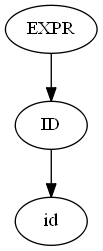

In [90]:
plt = Image(graph.create_png())
display(plt)